In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = pd.read_csv('/Users/lhaemmerli/Documents/Studies/Bachelor/UPM/Courses/BA6/CDAW/Datos.csv')

In [2]:
# General import and load data
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots

#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline

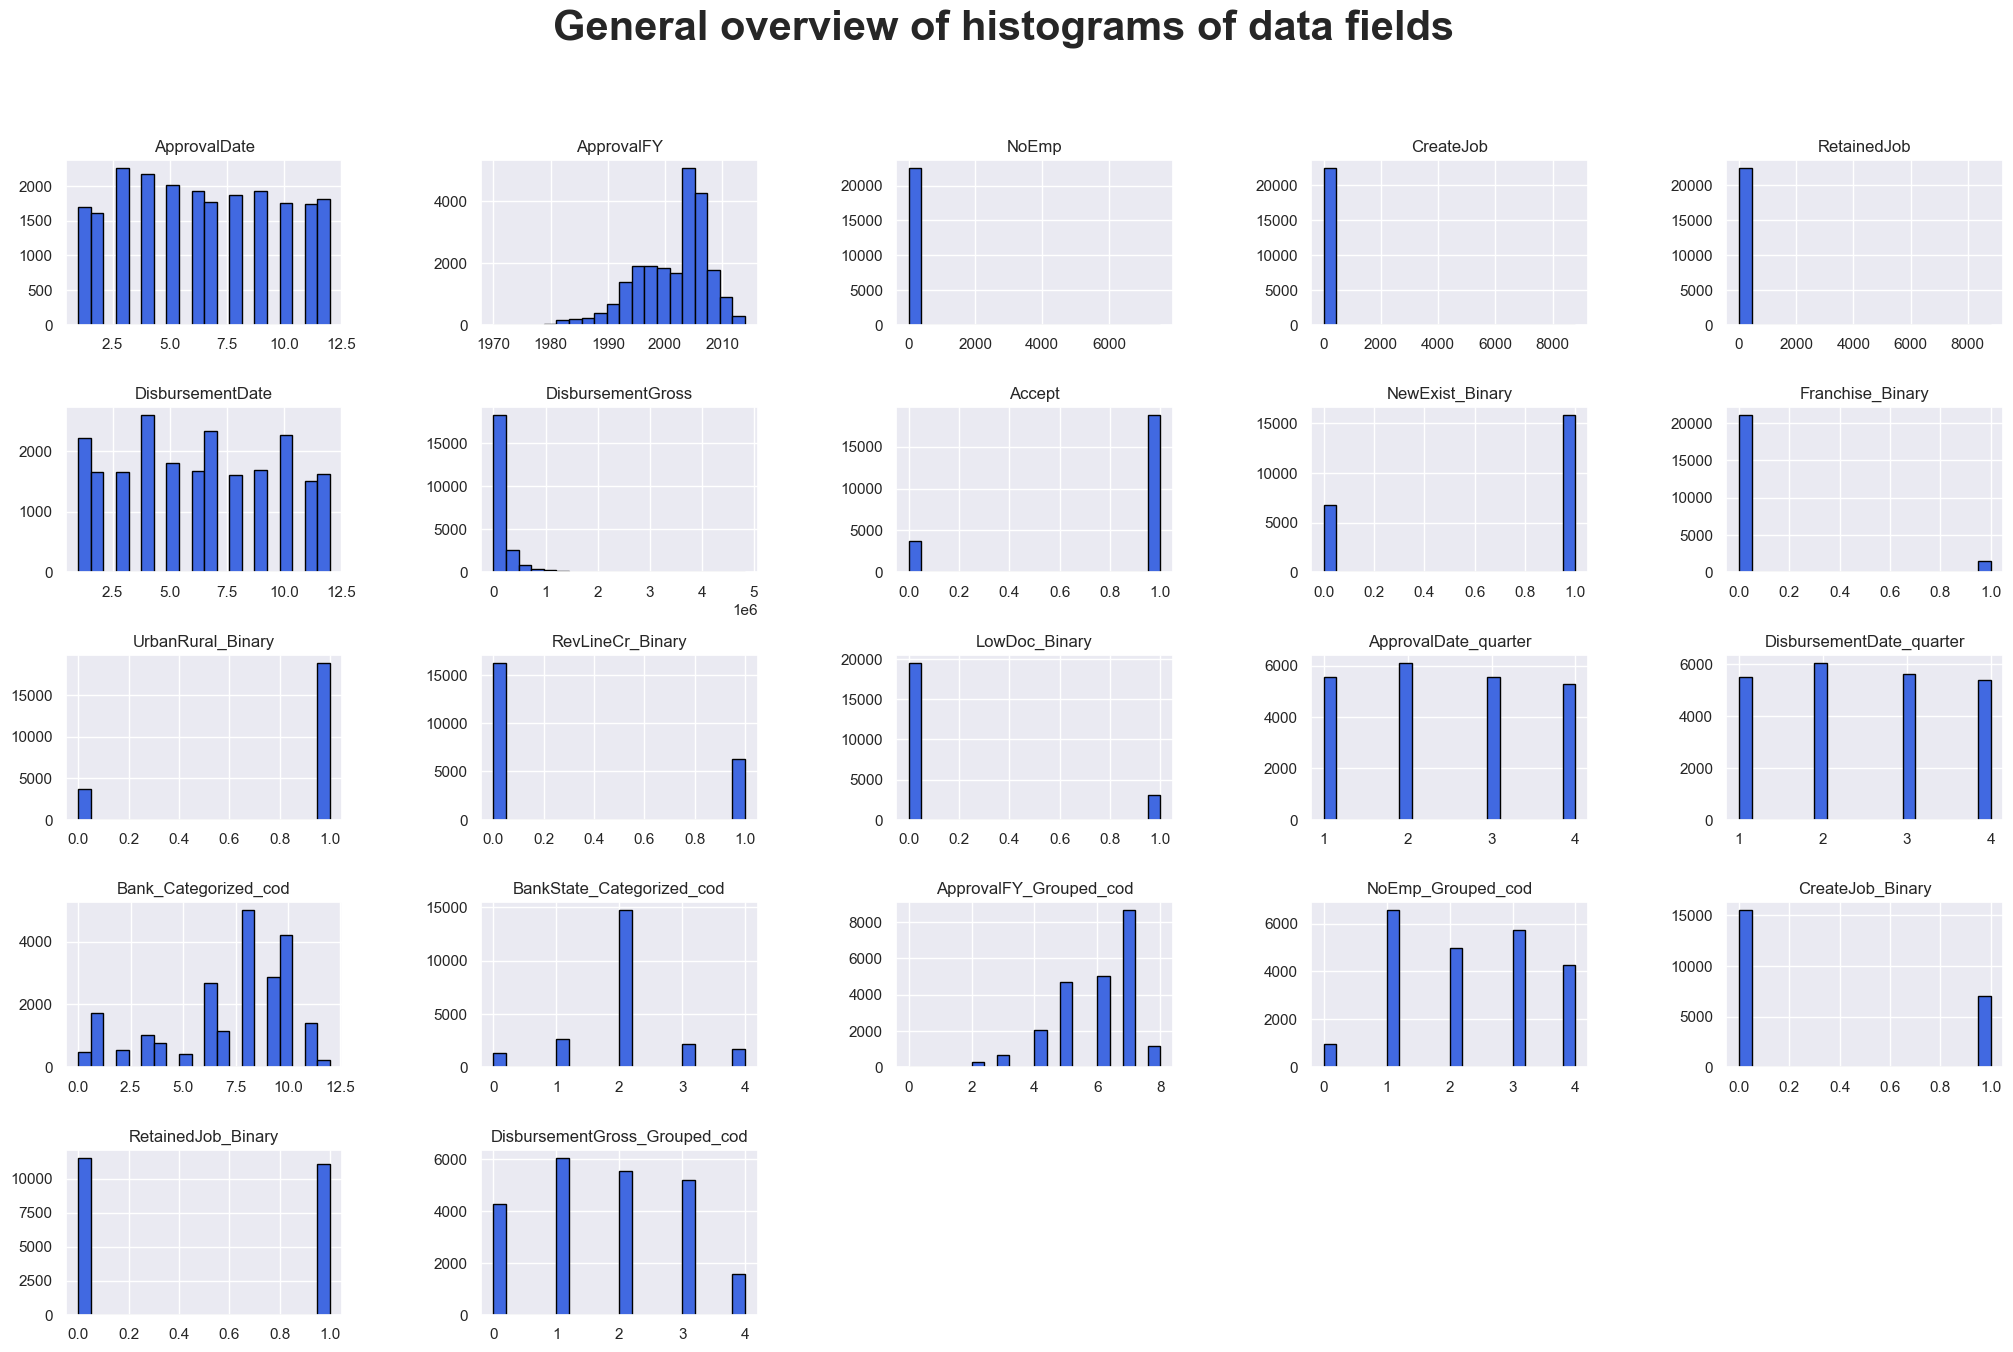

In [38]:
df.hist(figsize=(25, 15), bins=20, color="royalblue", edgecolor="black")
plt.suptitle("General overview of histograms of data fields", fontsize=30, fontweight="bold")
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
plt.show()



In [ ]:
#df without null value
g = sns.PairGrid(df, hue="Accept")
g.map(sns.scatterplot)
g.add_legend()

KeyboardInterrupt: 

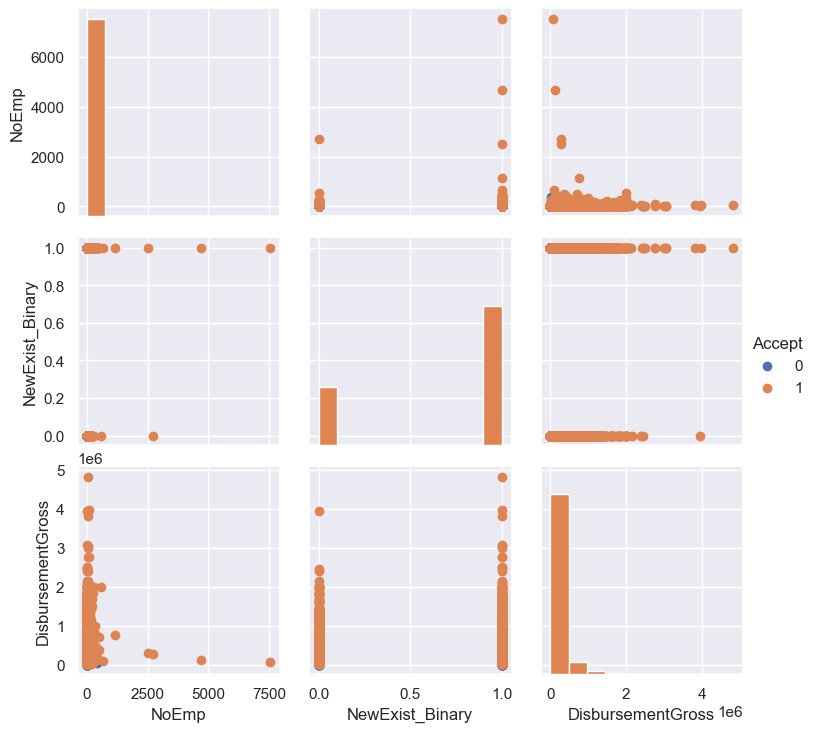

In [ ]:
# PairGrid of variables
g = sns.PairGrid(df, hue="Accept", vars=['NoEmp', 'NewExist_Binary', 'DisbursementGross'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

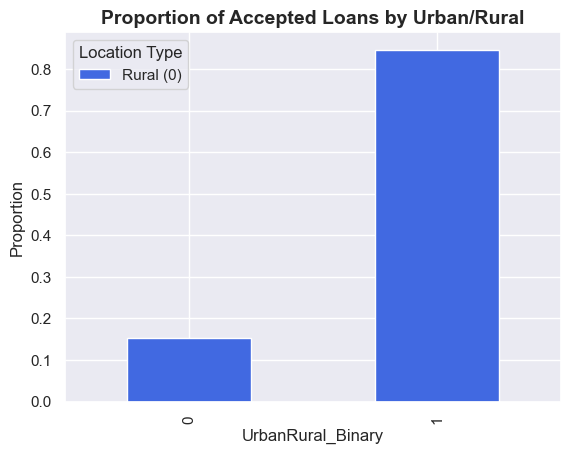

In [25]:
ax = (df.query('Accept == 1')
        .groupby(['UrbanRural_Binary'])
        .size() / len(df.query('Accept == 1'))
     ).plot(kind='bar', color=['royalblue'])

plt.xlabel("UrbanRural_Binary", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.title("Proportion of Accepted Loans by Urban/Rural", fontsize=14, fontweight="bold")

legend_labels = ["Rural (0)", "Urban (1)"]
ax.legend(legend_labels, title="Location Type")
plt.show()


We can see that there are more loan applications accepted in urban areas than rural areas.

/Users/lhaemmerli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(-200000.0, 1500000.0)

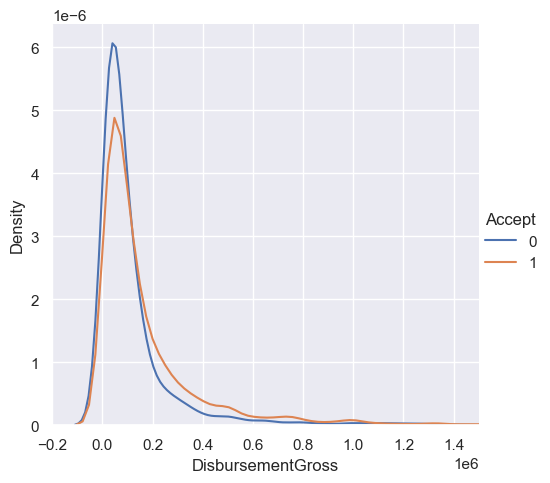

In [26]:
sns.FacetGrid(df, hue="Accept", height=5).map(sns.kdeplot, "DisbursementGross").add_legend()
plt.xlim(-0.2e6, 1.5*1e6)

/Users/lhaemmerli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(-100.0, 100.0)

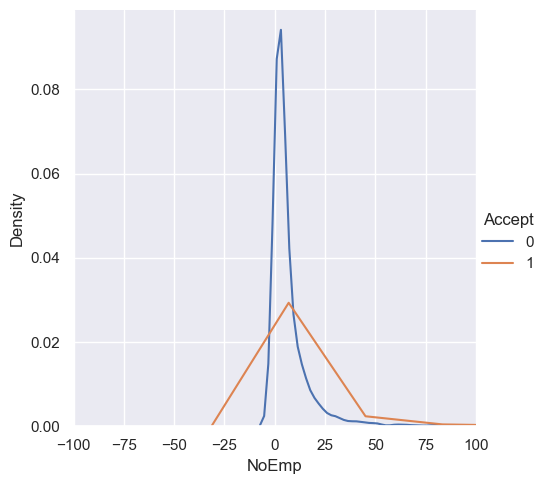

In [13]:
sns.FacetGrid(df, hue="Accept", height=5).map(sns.kdeplot, "NoEmp").add_legend()
plt.xlim(-100, 100)

Si las curvas para Accept = 0 y Accept = 1 son muy diferentes, esto sugiere que la variable "NoEmp" puede estar influenciada por el estado de aceptación.

In [ ]:
df.query('Accept == 1')['UrbanRural_Binary' ].value_counts(normalize=True).plot(kind='bar')


KeyError: ('UrbanRural_Binary', 'DisbursementGross_Grouped_cod')

<Axes: xlabel='DisbursementGross_Grouped_cod'>

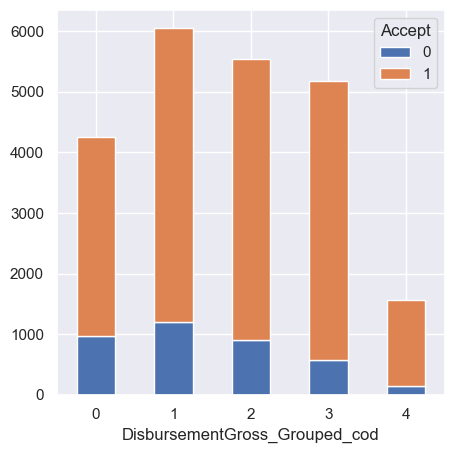

In [ ]:


#pclass_labels = ['First', 'Second', 'Third', 'Fourth']
#a_labels = ['Accept', 'Refused']
df.groupby(['DisbursementGross_Grouped_cod', 'Accept']).size().unstack(['Accept']).plot(kind='bar', stacked=True,rot=0, subplots=False, figsize=(5,5))

#plt.set_xticklabels(pclass_labels)
#plt.legend(labels=a_labels)
#plt.set_xlabel('Disbursement Gross per catergory')
##plt.set_title('DisbursementGross by acceptance')

<Axes: xlabel='NoEmp_Grouped'>

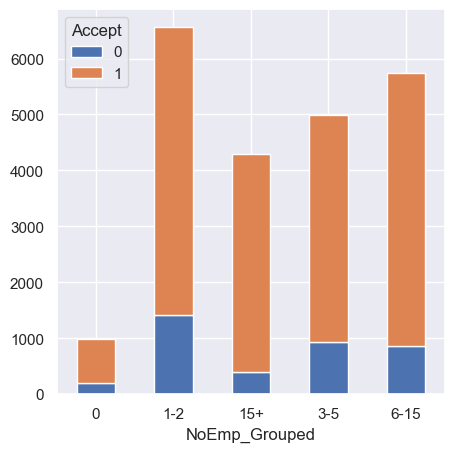

In [ ]:
df.groupby(['NoEmp_Grouped', 'Accept']).size().unstack(['Accept']).plot(kind='bar', stacked=True,rot=0, subplots=False, figsize=(5,5))
